In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


## Load and Preprocess Data

In [33]:
df = pd.read_csv('data/dataset.csv')

In [34]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [35]:
numerical_features = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
onehot_encoder = OneHotEncoder(sparse=False)
track_genre_encoded = onehot_encoder.fit_transform(df[['track_genre']])
track_genre_encoded_df = pd.DataFrame(track_genre_encoded, columns=onehot_encoder.get_feature_names_out())
processed_data = np.concatenate([scaled_numerical_features, track_genre_encoded], axis=1)
numerical_feature_names = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
genre_names = onehot_encoder.get_feature_names_out(input_features=['track_genre'])
all_feature_names = numerical_feature_names + list(genre_names)
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df.head()

C:\Users\brand\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.782627,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.975633,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.065299,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.692961,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.186125,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimensionality Reduction (PCA)

In [36]:
# PCA for dimensionality reduction
pca = PCA(n_components=2) # Adjust n_components based on your dataset, .95 leads to 53 features
reduced_data_pca = pca.fit_transform(processed_data)
reduced_data_pca.shape

(114000, 2)

## Clustering


In [37]:
kmeans = KMeans(n_clusters=5, random_state=42) # Adjust n_clusters based on your needs
clusters = kmeans.fit_predict(reduced_data_pca)

# Evaluate silhouette score
# silhouette_avg = silhouette_score(reduced_data_pca, clusters)
# print(f'Silhouette Score: {silhouette_avg:.2f}')

C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


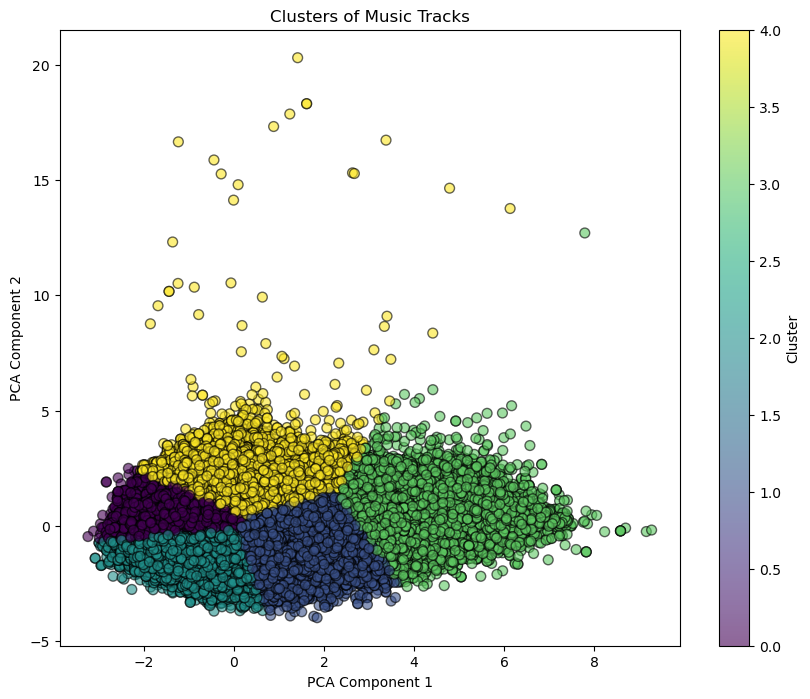

In [38]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters of Music Tracks')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Data Analysis

In [45]:
df2 = processed_df.copy()
df2['clusters'] = clusters
df2.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,clusters
0,1.782627,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.975633,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,1.065299,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.692961,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2.186125,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
centroids = df2.groupby('clusters').mean()
centroids

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.076597,0.003616,-0.041133,0.757060,0.603467,0.018438,-0.690973,-0.300284,0.210744,0.120329,...,0.010113,0.000983,0.009257,0.012364,0.000159,0.008021,0.009670,0.006436,0.007450,0.006499
1,0.022452,-0.175147,-0.047221,-0.985175,-0.511296,-0.160118,0.988881,-0.141153,-0.180067,-0.220578,...,0.006870,0.029530,0.010808,0.005544,0.034793,0.003134,0.000040,0.011531,0.012294,0.008517
2,0.018597,-0.283103,0.849369,0.221047,0.324497,0.263653,-0.134283,-0.455714,-0.113240,0.900762,...,0.013254,0.002369,0.011685,0.011877,0.002433,0.003329,0.003105,0.007107,0.011909,0.001153
3,-0.260019,-0.024316,-1.373783,-1.894520,-2.476642,-0.348141,1.670452,1.675297,-0.254584,-1.193703,...,0.000247,0.013323,0.002961,0.000247,0.005798,0.000987,0.000000,0.003084,0.001357,0.015051
4,-0.079449,0.728930,-0.709000,0.498967,0.199237,-0.110264,-0.667442,0.748359,0.188488,-0.919855,...,0.005157,0.002853,0.002743,0.005432,0.000329,0.030561,0.032755,0.014430,0.004170,0.023318


## Grid Search

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assume `data` is your input features
data = processed_data

# Define the range of parameters you want to search
pca_components = [2, 4, 8]
n_clusters = [2, 5, 10, 50]

best_score = -1
best_params = {'n_components': None, 'n_clusters': None}

for components in pca_components:
    pca = PCA(n_components=components)
    reduced_data = pca.fit_transform(data)
    for clusters in n_clusters:
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels = kmeans.fit_predict(reduced_data)
        score = silhouette_score(reduced_data, labels)
        print(score)
        
        if score > best_score:
            best_score = score
            best_params['n_components'] = components
            best_params['n_clusters'] = clusters

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.46013842865557747


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3436894510020834


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.32075957062979127


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.32014316850641167


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.32961436619986323


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2411026705904736


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2183410456861364


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.18846588588542376


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.24356538630569546


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.15909506459937267


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.17221804564039325


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.12773901920407993
Best Silhouette Score: 0.46013842865557747
Best Parameters: {'n_components': 2, 'n_clusters': 2}


In [28]:
scores = [.46, .34, .32, .32, .33, .24, .22, .19, .24, .16, .17, .12]

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assume `data` is your input features
data = processed_data

# Define the range of parameters you want to search
pca_components = [.95]
n_clusters = [2, 5, 10, 50]

best_score = -1
best_params = {'n_components': None, 'n_clusters': None}

for components in pca_components:
    pca = PCA(n_components=components)
    reduced_data = pca.fit_transform(data)
    for clusters in n_clusters:
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels = kmeans.fit_predict(reduced_data)
        score = silhouette_score(reduced_data, labels)
        print(score)
        
        if score > best_score:
            best_score = score
            best_params['n_components'] = components
            best_params['n_clusters'] = clusters

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)

C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.21860414910686907


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.13522039513176556


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.13297789198782498


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.09780074803953527
Best Silhouette Score: 0.21860414910686907
Best Parameters: {'n_components': 0.95, 'n_clusters': 2}


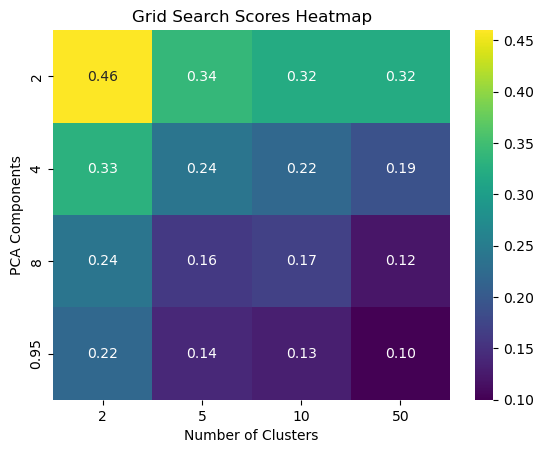

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#grid search results
pca_components = [2, 4, 8, .95]
n_clusters = [2, 5, 10, 50]
scores = [.46, .34, .32, .32, .33, .24, .22, .19, .24, .16, .17, .12, .22, .14, .13, .10]

# Reshaping
scores_matrix = np.array(scores).reshape(len(pca_components), len(n_clusters))

# Creating a heatmap
sns.heatmap(scores_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=n_clusters, yticklabels=pca_components)

plt.title("Grid Search Scores Heatmap")
plt.xlabel("Number of Clusters")
plt.ylabel("PCA Components")
plt.show()


Best is actually 2 PCA with 5 Clusters